# IPL INFOGRAPHICS PROJECT-FINAL NOTEBOOK

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [289]:
df = pd.read_csv('all_season_details.csv', low_memory=False)

### INITIAL EXPLORATION

In [291]:
df.head()

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN


In [6]:
df.shape

(242550, 45)

In [8]:
df.isnull().sum()

comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id           

In [10]:
df.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [12]:
batsman_col=df[['batsman1_id','batsman1_name','batsman1_runs','batsman1_balls']]
batsman_col

,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls
0,379140,Devon Conway,0,1
1,379140,Devon Conway,0,2
2,1060380,Ruturaj Gaikwad,0,1
3,1060380,Ruturaj Gaikwad,1,2
4,379140,Devon Conway,0,3
...,...,...,...,...
242545,8166,Shane Warne,7,7
242546,8166,Shane Warne,8,8
242547,8166,Shane Warne,9,9
242548,43265,Sohail Tanvir,6,5


In [14]:
batsman_col.head()

,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls
0,379140,Devon Conway,0,1
1,379140,Devon Conway,0,2
2,1060380,Ruturaj Gaikwad,0,1
3,1060380,Ruturaj Gaikwad,1,2
4,379140,Devon Conway,0,3


In [16]:
df.describe()

,comment_id,season,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,242550.000000,242067.000000,2.425500e+05,242550.000000,242550.000000,242550.000000,242550.000000,2.425500e+05,242550.000000,242550.000000,...,242550.000000,242550.000000,2.297090e+05,229709.000000,229709.000000,229709.000000,229709.000000,1.188000e+04,11880.000000,11880.000000
mean,86415.531767,2015.588048,8.701769e+05,1.483245,10.161678,3.483875,1.317901,2.503057e+05,18.047631,14.119819,...,16.551618,13.219233,3.151650e+05,2.198914,0.024483,16.235019,0.551868,2.635273e+05,18.815404,15.311869
std,79516.360959,4.639506,3.530671e+05,0.499720,5.658053,1.707451,1.612821,2.968806e+05,18.341545,11.905881,...,17.771899,11.892068,3.222056e+05,1.046243,0.155527,10.171336,0.773715,3.039915e+05,19.542348,12.695239
min,110.000000,2008.000000,3.359820e+05,1.000000,1.000000,1.000000,0.000000,4.292000e+03,0.000000,0.000000,...,0.000000,0.000000,4.508000e+03,0.100000,0.000000,0.000000,0.000000,4.292000e+03,0.000000,0.000000
25%,18040.000000,2012.000000,5.483150e+05,1.000000,5.000000,2.000000,0.000000,3.296600e+04,4.000000,5.000000,...,3.000000,4.000000,3.333500e+04,1.000000,0.000000,8.000000,0.000000,3.314100e+04,4.000000,5.000000
50%,29010.000000,2015.000000,8.298190e+05,1.000000,10.000000,3.000000,1.000000,5.291200e+04,12.000000,11.000000,...,11.000000,10.000000,2.655640e+05,2.000000,0.000000,14.000000,0.000000,2.118540e+05,12.000000,12.000000
75%,118060.000000,2020.000000,1.216506e+06,2.000000,15.000000,5.000000,1.000000,3.791430e+05,27.000000,20.000000,...,25.000000,20.000000,4.752810e+05,3.000000,0.000000,23.000000,1.000000,3.984390e+05,28.000000,22.000000
max,219080.000000,2023.000000,1.370353e+06,2.000000,20.000000,7.000000,7.000000,1.349361e+06,174.000000,73.000000,...,174.000000,73.000000,1.350792e+06,4.000000,2.000000,70.000000,5.000000,1.312645e+06,129.000000,69.000000


## DESCRIPTIVE ANALYSIS FOR RUNS,BATSMAN RUNS AND BOWLERS

### Runs Summary

In [20]:
print("Maximum Runs:", df['runs'].max())
print("Minimum Runs:", df['runs'].min())
print("Runs Summary:\n", df['runs'].describe())

Maximum Runs: 7
Minimum Runs: 0
Runs Summary:
 count    242550.000000
mean          1.317901
std           1.612821
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: runs, dtype: float64


#### The insight is that the mean of the runs is 1.317 and the maximum of the run is 7

### Batsman Run Summary

In [24]:
print("Batsman1 Runs Maximun:", df['batsman1_runs'].max())
print("Batsman1 Runs Minimum:", df['batsman1_runs'].min())
print("Batsman1 Runs Summary:\n", df['batsman1_runs'].describe())

Batsman1 Runs Maximun: 174
Batsman1 Runs Minimum: 0
Batsman1 Runs Summary:
 count    242550.000000
mean         18.047631
std          18.341545
min           0.000000
25%           4.000000
50%          12.000000
75%          27.000000
max         174.000000
Name: batsman1_runs, dtype: float64


### Bowlers Wicket Summary

In [28]:
print("Batsman1 Wicket Maximun:", df['bowler1_wkts'].max())
print("Batsman1 Wicket Minimum:", df['bowler1_wkts'].min())
print("Batsman1 Wicket Summary:\n", df['bowler1_wkts'].describe())

Batsman1 Wicket Maximun: 6
Batsman1 Wicket Minimum: 0
Batsman1 Wicket Summary:
 count    242550.000000
mean          0.468262
std           0.728663
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: bowler1_wkts, dtype: float64


### Total runs per innings

In [31]:
df[['current_innings','runs']].head()

,current_innings,runs
0,CSK,0
1,CSK,1
2,CSK,0
3,CSK,1
4,CSK,0


In [33]:
runs_per_innings = df.groupby('current_innings')['runs'].sum()
print("Runs per Innings:\n", runs_per_innings)

Runs per Innings:
 current_innings
CSK      35859
DC       47870
GL        4842
GT        5678
KKR      36422
KXIP     29904
Kochi     1892
LSG       4822
MI       39291
PBKS      6977
PWI       6330
RCB      37492
RPS       4511
RR       31917
SRH      25850
Name: runs, dtype: int64


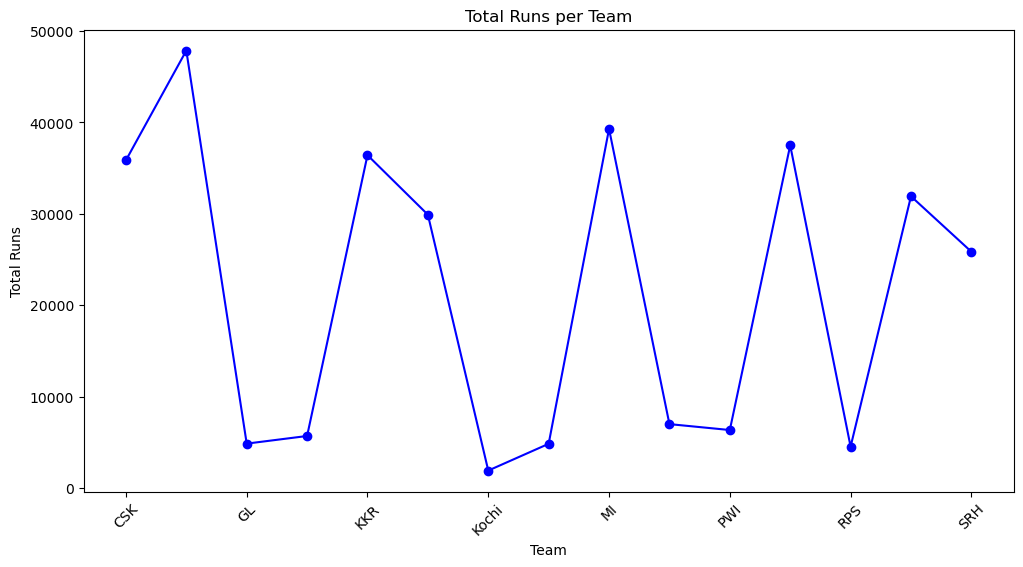

In [35]:
plt.figure(figsize=(12, 6))
runs_per_innings.plot(kind='line', marker='o', color='b')
plt.title("Total Runs per Team")
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()

#### The team with higher cumulative scores tends to have higher longetivity and sustained batting ability

### Highest Score by a Team

In [39]:
highest_score = runs_per_innings[runs_per_innings >= 30000].sort_values(ascending = False)
print("The teams with the highest total runs:\n", highest_score)

The teams with the highest total runs:
 current_innings
DC     47870
MI     39291
RCB    37492
KKR    36422
CSK    35859
RR     31917
Name: runs, dtype: int64


#### The team with higher cumulative scores tends to have higher longetivity and sustained batting ability

In [42]:
df['current_innings'].unique()

array(['CSK', 'GT', 'PBKS', 'KKR', 'LSG', 'DC', 'RR', 'SRH', 'MI', 'RCB',
       'KXIP', 'RPS', 'GL', 'PWI', 'Kochi'], dtype=object)

### Batsmen and Bowlers Statistics

In [45]:
batsman1_runs_stats = {
    'Total Runs': df['batsman1_runs'].sum(),
    'Mean Runs': df['batsman1_runs'].mean(),
    'Median Runs': df['batsman1_runs'].median(),
    'Standard Deviation': df['batsman1_runs'].std()
}

batsman2_runs_stats = {
    'Total Runs': df['batsman2_runs'].sum(),
    'Mean Runs': df['batsman2_runs'].mean(),
    'Median Runs': df['batsman2_runs'].median(),
    'Standard Deviation': df['batsman2_runs'].std()
}

print("Batsman 1 Runs Statistics:")
print(batsman1_runs_stats)
print("\nBatsman 2 Runs Statistics:")
print(batsman2_runs_stats)

Batsman 1 Runs Statistics:
{'Total Runs': 4377453, 'Mean Runs': 18.047631416202844, 'Median Runs': 12.0, 'Standard Deviation': 18.341544810451282}

Batsman 2 Runs Statistics:
{'Total Runs': 4014595, 'Mean Runs': 16.551618223046795, 'Median Runs': 11.0, 'Standard Deviation': 17.771898709953874}


#### The more runs scored by Batsman 1 in the matches.

In [48]:
df['batsman1_strike_rate'] = (df['batsman1_runs'] / df['batsman1_balls']) * 100
df['batsman2_strike_rate'] = (df['batsman2_runs'] / df['batsman2_balls']) * 100

# Mean Strike Rates
mean_strike_rate_batsman1 = df['batsman1_strike_rate'].mean()
mean_strike_rate_batsman2 = df['batsman2_strike_rate'].mean()

print(f"\nMean Strike Rate for Batsman 1: {mean_strike_rate_batsman1:.2f}")
print(f"Mean Strike Rate for Batsman 2: {mean_strike_rate_batsman2:.2f}")


Mean Strike Rate for Batsman 1: 114.95
Mean Strike Rate for Batsman 2: 113.01


#### Both the batsman has more or less same strike rate and are very good at scoring runs quickly

## EXPLORATORY DATA ANALYSIS

### Runs Scored Per Over & Wickets Per Over

In [53]:
runs_per_over = df.groupby('over')['runs'].sum()
wickets_per_over = df.groupby('over')['bowler1_wkts'].sum()
print("Runs per Over:\n", runs_per_over)
print("Wickets per Over:\n", wickets_per_over)

Runs per Over:
 over
1     12293
2     14858
3     16392
4     17043
5     17161
6     17083
7     13726
8     14788
9     15327
10    15193
11    15451
12    15765
13    16016
14    16357
15    16841
16    17050
17    17639
18    18192
19    17615
20    14867
Name: runs, dtype: int64
Wickets per Over:
 over
1      1341
2      1495
3      3840
4      3820
5      4544
6      4332
7      3177
8      3378
9      4072
10     4160
11     5458
12     5659
13     6648
14     7042
15     7888
16     8339
17     9330
18     9765
19    10609
20     8680
Name: bowler1_wkts, dtype: int64


In [57]:
performance_trends = df.groupby(['season', 'home_team'])['runs'].value_counts().fillna(0)
print(performance_trends)

season  home_team  runs
2008.0  CSK        1       846
                   0       785
                   4       260
                   2       156
                   6        98
                          ... 
2023.0  SRH        2       109
                   6        80
                   3         5
                   5         5
                   7         1
Name: count, Length: 990, dtype: int64


In [59]:
performance_trends.head()

season  home_team  runs
2008.0  CSK        1       846
                   0       785
                   4       260
                   2       156
                   6        98
Name: count, dtype: int64

### Dismissal kinds

In [62]:
wicket_data = df.dropna(subset=['wkt_batsman_name'])
avg_runs_before_dismissal = wicket_data.groupby('wkt_batsman_name')['wkt_batsman_runs'].mean().sort_values(ascending=False)
print("\nAverage Runs Before Dismissal for Each Batsman:\n", avg_runs_before_dismissal.head())


Average Runs Before Dismissal for Each Batsman:
 wkt_batsman_name
Vivrant Sharma    69.000000
Devon Conway      36.000000
Sai Sudharsan     36.000000
Morne van Wyk     35.333333
Lendl Simmons     33.888889
Name: wkt_batsman_runs, dtype: float64


#### The average run they scored before dismissal is 69

In [65]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

wkt_batsman_name        230670
wicket_id               230670
wkt_text                230670
wkt_batsman_balls       230670
wkt_batsman_runs        230670
wkt_bowler_name         230670
postText                222856
preText                 196275
batsman2_strike_rate     16917
bowler2_wkts             12841
bowler2_runs             12841
bowler2_maidens          12841
bowler2_overs            12841
bowler2_name             12841
bowler2_id               12841
text                      1372
batsman1_strike_rate       635
season                     483
batsman2_name                2
dtype: int64

#### The missing values are more in wicket related columns and less than ten in batsman2_name

In [68]:
import seaborn as sns

In [70]:
df.head()

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText,batsman1_strike_rate,batsman2_strike_rate
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN,0.0,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN,0.0,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN,0.0,0.0
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN,50.0,0.0
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN,0.0,50.0


In [72]:
df.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText', 'batsman1_strike_rate', 'batsman2_strike_rate'],
      dtype='object')

In [74]:
df['isRetiredHurt'].unique()

array([False,  True])

### Tops Batsman by Runs

In [77]:
top_batsmen = df.groupby('batsman1_name')['batsman1_runs'].sum().sort_values(ascending=False).head(10)
print("Top 10 Batsmen by Runs:\n", top_batsmen)

Top 10 Batsmen by Runs:
 batsman1_name
Virat Kohli       133423
David Warner      126924
Shikhar Dhawan    126135
Rohit Sharma       97967
Chris Gayle        94477
Suresh Raina       86088
KL Rahul           85826
Ajinkya Rahane     80968
Gautam Gambhir     79674
AB de Villiers     76932
Name: batsman1_runs, dtype: int64


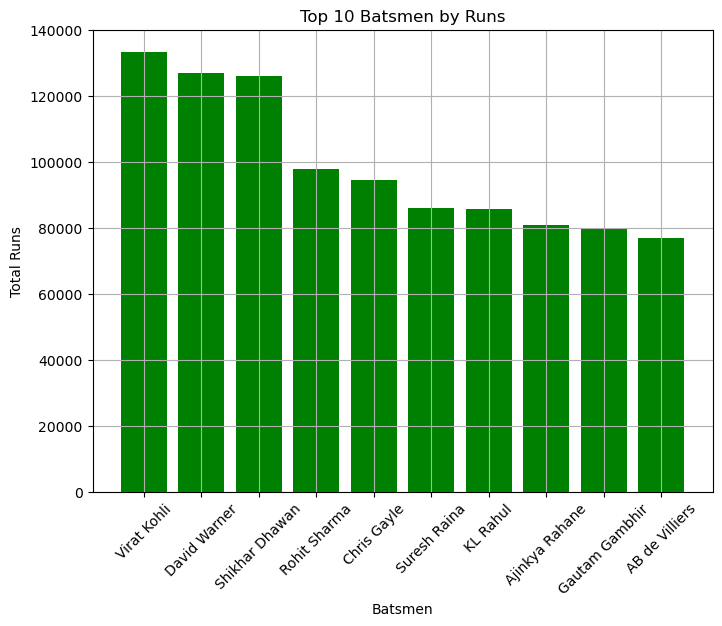

In [79]:
plt.figure(figsize=(8, 6))
plt.bar(top_batsmen.index, top_batsmen.values, color='green')
plt.title("Top 10 Batsmen by Runs")
plt.xlabel("Batsmen")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### The top 10 batsman in the whole IPL matches are listed above

In [82]:
season_batsman_runs = df.groupby(['season', 'batsman1_name'])['batsman1_runs'].sum()
season_batsman_runs = season_batsman_runs.reset_index()
top_batsman_each_season = season_batsman_runs.sort_values(['season', 'batsman1_runs'], ascending=[True, False]).groupby('season').first()
print("Top Batsman in Each Season:\n", top_batsman_each_season)

Top Batsman in Each Season:
           batsman1_name  batsman1_runs
season                                
2008.0      Shaun Marsh          15551
2009.0   Matthew Hayden          11153
2010.0   Jacques Kallis          12463
2011.0      Chris Gayle          12520
2012.0      Chris Gayle          14735
2013.0      Chris Gayle          16284
2014.0    Robin Uthappa          12685
2015.0   Ajinkya Rahane          11748
2016.0      Virat Kohli          22369
2017.0     David Warner          13283
2018.0  Kane Williamson          13775
2019.0     David Warner          15633
2020.0         KL Rahul          15763
2021.0         KL Rahul          13433
2022.0      Jos Buttler          20687
2023.0     Shubman Gill          20821


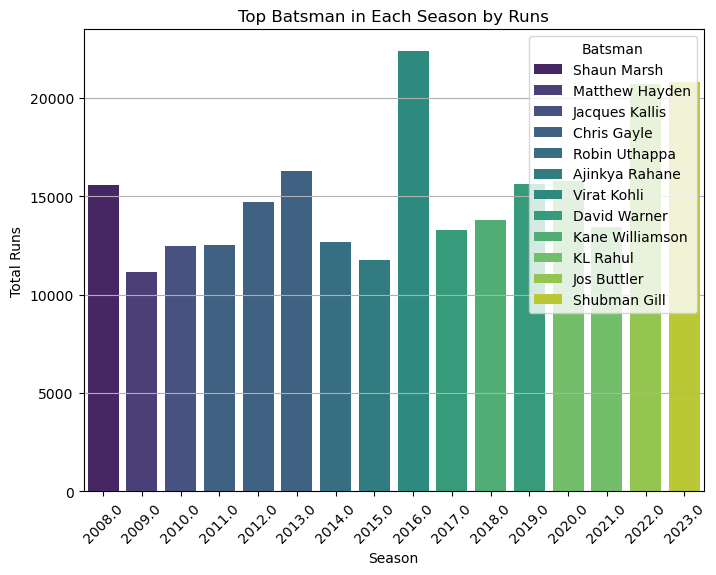

In [84]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_batsman_each_season, x='season', y='batsman1_runs', hue='batsman1_name', dodge=False, palette='viridis')
plt.title("Top Batsman in Each Season by Runs")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.legend(title="Batsman")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### The above graph shows the best batsman in each season, with this we get that Virat Kohli has scored highest runs in 2016 surpassing other batsmen.

### Top Bowlers by Wicket

In [88]:
top_bowlers = df.groupby('bowler1_name')['bowler1_wkts'].sum().sort_values(ascending=False).head(10)
print("Top 10 Bowlers by Wickets:\n", top_bowlers)

Top 10 Bowlers by Wickets:
 bowler1_name
Yuzvendra Chahal       1966
Piyush Chawla          1960
Ravichandran Ashwin    1918
Amit Mishra            1875
Bhuvneshwar Kumar      1721
Sunil Narine           1693
Harbhajan Singh        1677
Dwayne Bravo           1668
Lasith Malinga         1614
Ravindra Jadeja        1554
Name: bowler1_wkts, dtype: int64


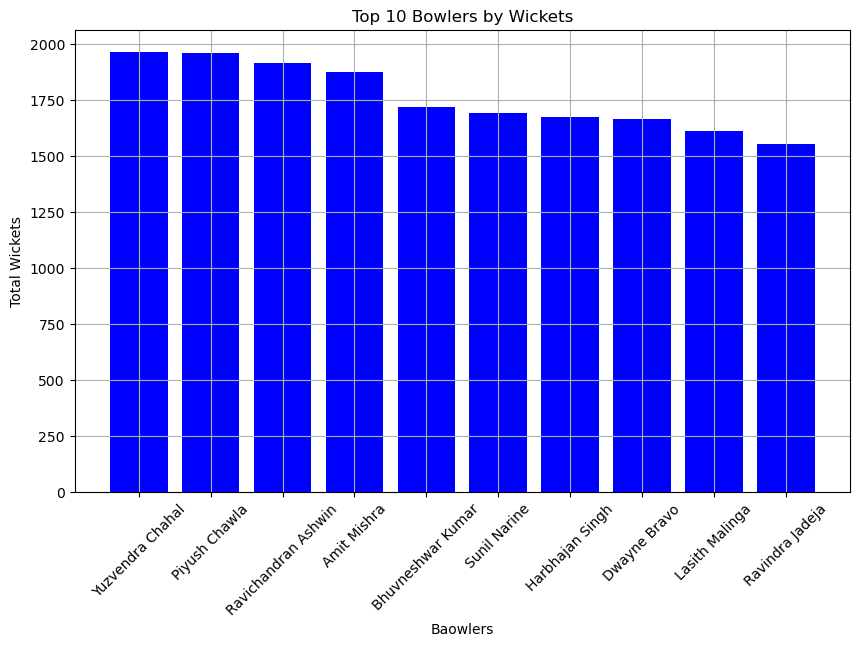

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(top_bowlers.index, top_bowlers.values, color='blue')
plt.title("Top 10 Bowlers by Wickets")
plt.xlabel("Baowlers")
plt.ylabel("Total Wickets")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [92]:
season_bowlers_wickets = df.groupby(['season', 'bowler1_name'])['bowler1_wkts'].sum()
season_bowlers_wickets = season_bowlers_wickets.reset_index()
top_bowlers_each_season = season_bowlers_wickets.sort_values(['season', 'bowler1_name'], ascending=[True, False]).groupby('season').first()
print("Top Bowler in Each Season:\n", top_bowlers_each_season)

Top Bowler in Each Season:
             bowler1_name  bowler1_wkts
season                                
2008.0       Zaheer Khan           142
2009.0       Zaheer Khan            60
2010.0       Zaheer Khan           115
2011.0       Zaheer Khan           135
2012.0       Zaheer Khan           179
2013.0       Zaheer Khan            39
2014.0       Zaheer Khan            55
2015.0       Zaheer Khan           101
2016.0       Zaheer Khan           101
2017.0       Zaheer Khan           113
2018.0  Yuzvendra Chahal           162
2019.0  Yuzvendra Chahal           184
2020.0  Yuzvendra Chahal           254
2021.0  Yuzvendra Chahal           167
2022.0  Yuzvendra Chahal           254
2023.0  Yuzvendra Chahal           201


### Run Distribution by Over

In [96]:
run_distribution_by_over = df.groupby('over')['runs'].sum()
print("Run Distribution by Over:\n", run_distribution_by_over)

Run Distribution by Over:
 over
1     12293
2     14858
3     16392
4     17043
5     17161
6     17083
7     13726
8     14788
9     15327
10    15193
11    15451
12    15765
13    16016
14    16357
15    16841
16    17050
17    17639
18    18192
19    17615
20    14867
Name: runs, dtype: int64


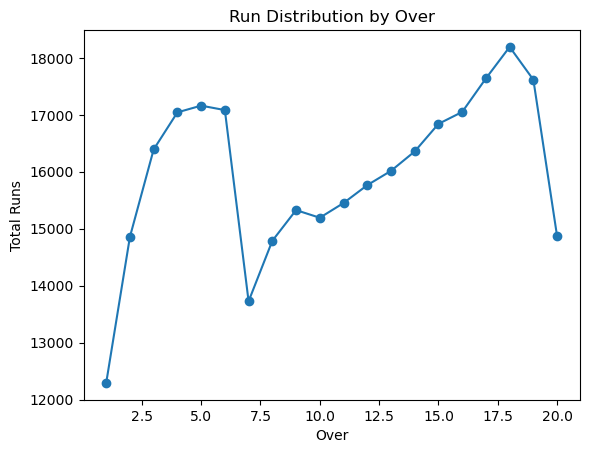

In [98]:
run_distribution_by_over.plot(kind='line', title='Run Distribution by Over',marker = 'o')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()

#### The runs distribution is more in the last overs and then in the starting overs

In [102]:
run_distribution_by_over_season = df.groupby(['season', 'over'])['runs'].sum().reset_index()
print("Run Distribution by Over for Each Season:\n", run_distribution_by_over_season)

Run Distribution by Over for Each Season:
      season  over  runs
0    2008.0     1   703
1    2008.0     2   923
2    2008.0     3   826
3    2008.0     4   912
4    2008.0     5  1017
..      ...   ...   ...
315  2023.0    16  1291
316  2023.0    17  1368
317  2023.0    18  1321
318  2023.0    19  1362
319  2023.0    20  1076

[320 rows x 3 columns]


### Extras Breakdown

In [105]:
extras = df[['isWide', 'isNoball']].sum()
print("Extras Breakdown:\n", extras)

Extras Breakdown:
 isWide      7601
isNoball    1001
dtype: int64


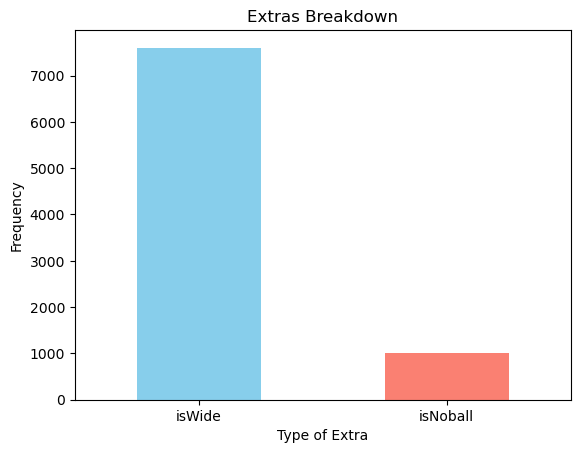

In [107]:
extras.plot(kind='bar', color=['skyblue', 'salmon'], title='Extras Breakdown')
plt.xlabel('Type of Extra')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [109]:
extras_by_season = df.groupby('season')[['isWide', 'isNoball']].sum().reset_index()
print("Extras Breakdown by Season:\n", extras_by_season)

Extras Breakdown by Season:
     season  isWide  isNoball
0   2008.0     457        82
1   2009.0     434        73
2   2010.0     495        60
3   2011.0     501        83
4   2012.0     497        61
5   2013.0     476        59
6   2014.0     399        54
7   2015.0     447        49
8   2016.0     429        48
9   2017.0     418        38
10  2018.0     436        39
11  2019.0     395        59
12  2020.0     446        52
13  2021.0     460        76
14  2022.0     696        71
15  2023.0     597        95


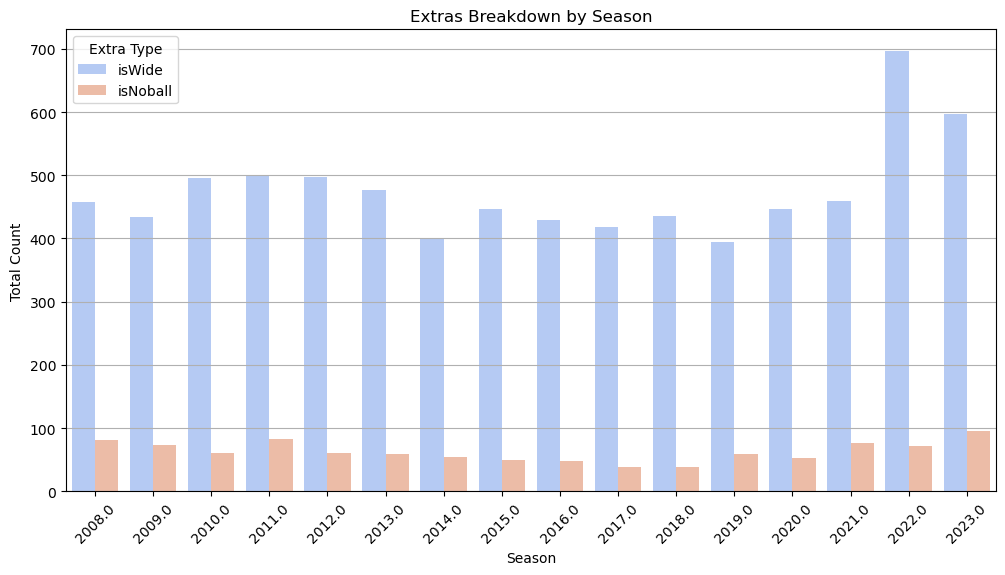

In [111]:
plt.figure(figsize=(12, 6))
extras_melted = extras_by_season.melt(id_vars='season', var_name='Extra Type', value_name='Count')
sns.barplot(data=extras_melted, x='season', y='Count', hue='Extra Type', palette='coolwarm')
plt.title("Extras Breakdown by Season")
plt.xlabel("Season")
plt.ylabel("Total Count")
plt.legend(title="Extra Type")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### The insight on most extra breakdowns are Wides and the high number of wides were in the year 2022 and high number of noball were in 2023

### Performance by Team

In [115]:
performance_trends = df.groupby(['season', 'home_team'])['runs'].value_counts().unstack().fillna(0)
performance_trends

runs                  0      1      2    3      4    5      6    7
season home_team                                                  
2008.0 CSK        785.0  846.0  156.0  9.0  260.0  9.0   98.0  2.0
       DC         491.0  662.0   88.0  6.0  225.0  2.0   76.0  0.0
       KKR        639.0  611.0   63.0  3.0  185.0  7.0   53.0  0.0
       KXIP       572.0  679.0  112.0  6.0  228.0  4.0  100.0  0.0
       MI         579.0  563.0   77.0  6.0  186.0  3.0   76.0  2.0
...                 ...    ...    ...  ...    ...  ...    ...  ...
2023.0 MI         433.0  607.0   70.0  4.0  215.0  2.0  112.0  4.0
       PBKS       454.0  576.0  105.0  3.0  209.0  3.0   90.0  3.0
       RCB        495.0  756.0  114.0  1.0  218.0  1.0  133.0  0.0
       RR         510.0  706.0  112.0  4.0  204.0  3.0   87.0  0.0
       SRH        590.0  684.0  109.0  5.0  229.0  5.0   80.0  1.0

[135 rows x 8 columns]

In [117]:
consistency_batsman1 = df.groupby('batsman1_name')['batsman1_runs'].agg(['mean', 'std']).sort_values(by = 'mean', ascending = False).head()
consistency_batsman1.reset_index(inplace=True)
consistency_batsman1

,batsman1_name,mean,std
0,Vivrant Sharma,31.367347,22.285733
1,Hashim Amla,30.640288,26.586219
2,Devon Conway,30.038864,23.698297
3,Jos Buttler,27.368725,25.351677
4,KL Rahul,27.048850,23.002778


#### The top bats_man who score consistently scores highest average runs across games, this way we could find top performers

In [120]:
consistency_batsman1_season = (
    df.groupby(['season', 'batsman1_name'])['batsman1_runs']
    .agg(['mean', 'std'])
    .sort_values(by=['season', 'mean'], ascending=[True, False])
    .groupby('season')
    .head(5)
    .reset_index()
)
consistency_batsman1_season

,season,batsman1_name,mean,std
0,2008.0,Brendon McCullum,55.406250,46.434692
1,2008.0,Shaun Marsh,34.404867,26.909016
2,2008.0,Simon Katich,33.527778,25.686064
3,2008.0,Michael Hussey,33.160000,30.393287
4,2008.0,Andrew Symonds,32.270270,33.759294
...,...,...,...,...
75,2023.0,Shubman Gill,35.774914,28.421693
76,2023.0,Yashasvi Jaiswal,34.905852,25.596930
77,2023.0,Virat Kohli,32.367865,23.537294
78,2023.0,Vivrant Sharma,31.367347,22.285733


In [122]:
consistency_batsman1_season[consistency_batsman1_season['season'] == 2008]

,season,batsman1_name,mean,std
0,2008.0,Brendon McCullum,55.406250,46.434692
1,2008.0,Shaun Marsh,34.404867,26.909016
2,2008.0,Simon Katich,33.527778,25.686064
3,2008.0,Michael Hussey,33.160000,30.393287
4,2008.0,Andrew Symonds,32.270270,33.759294


#### The top batsman who are consistent in the year 2008

### Total Boundaries each season

In [126]:
boundaries = df[df['isBoundary'] == True]
total_boundaries = boundaries.groupby('season').size().reset_index(name='total_boundaries')
total_boundaries

,season,total_boundaries
0,2008.0,2320
1,2009.0,1816
2,2010.0,2272
3,2011.0,2547
4,2012.0,2628
5,2013.0,2714
6,2014.0,2264
7,2015.0,2285
8,2016.0,2261
9,2017.0,2305


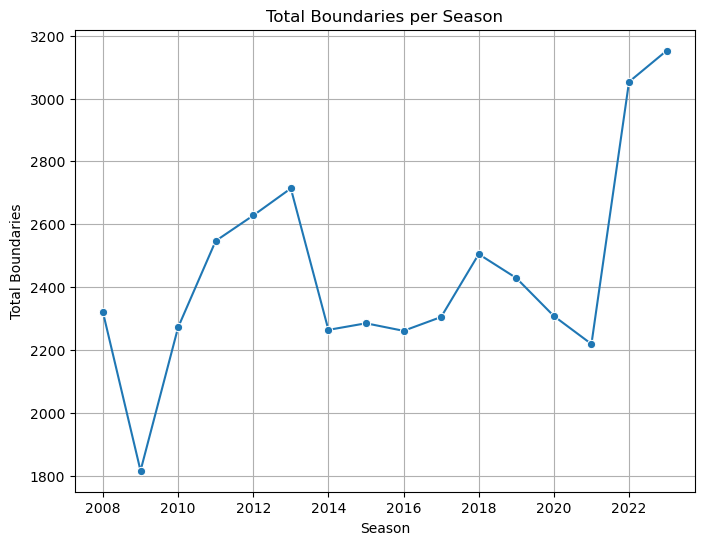

In [128]:
plt.figure(figsize=(8,6))
sns.lineplot(data=total_boundaries, x='season', y='total_boundaries', marker='o')
plt.title('Total Boundaries per Season')
plt.xlabel('Season')
plt.ylabel('Total Boundaries')
plt.grid(True)
plt.show()

#### The insight for this data is that the higher boundaries was seen in 2022 and lesser boundary in 2008. This gives the idea about how efficient the team has become over the times and range of boundaries had up and downs but increased over the last year

### Total Boundary by each team

In [132]:
boundaries_df = df[df['isBoundary'] == True]
total_boundaries_by_team = boundaries_df.groupby('current_innings').size().reset_index(name='total_boundaries')
print(total_boundaries_by_team)

   current_innings  total_boundaries
0              CSK              4353
1               DC              5824
2               GL               614
3               GT               706
4              KKR              4543
5             KXIP              3681
6            Kochi               223
7              LSG               583
8               MI              4934
9             PBKS               893
10             PWI               717
11             RCB              4609
12             RPS               522
13              RR              3954
14             SRH              3030


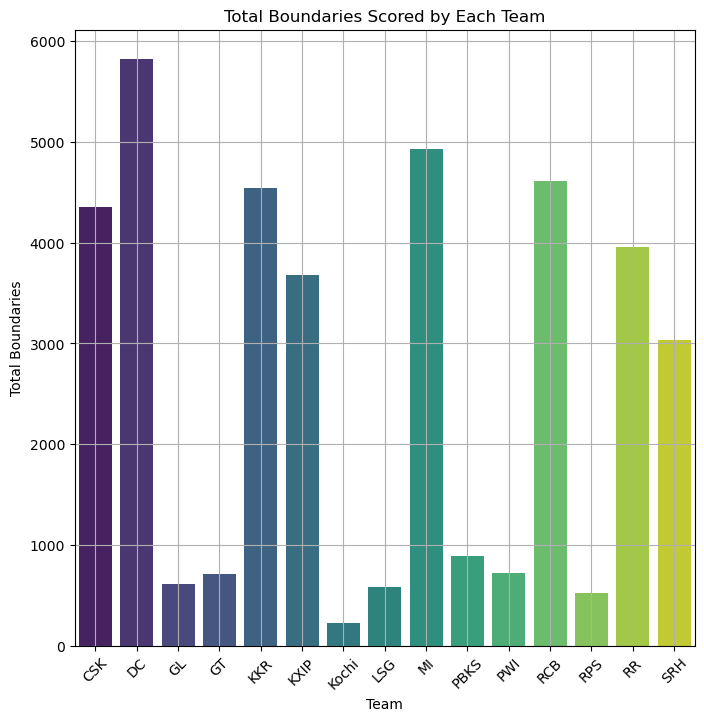

In [134]:
plt.figure(figsize=(8, 8))
sns.barplot(data=total_boundaries_by_team, x='current_innings', y='total_boundaries', hue='current_innings', palette='viridis', dodge=False, legend=False)
plt.title('Total Boundaries Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Boundaries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## PREPROCESSING 

In [137]:
df.isnull().sum()

comment_id                   0
season                     483
match_id                     0
match_name                   0
home_team                    0
away_team                    0
current_innings              0
innings_id                   0
over                         0
ball                         0
runs                         0
shortText                    0
isBoundary                   0
isWide                       0
isNoball                     0
batsman1_id                  0
batsman1_name                0
batsman1_runs                0
batsman1_balls               0
bowler1_id                   0
bowler1_name                 0
bowler1_overs                0
bowler1_maidens              0
bowler1_runs                 0
bowler1_wkts                 0
batsman2_id                  0
batsman2_name                2
batsman2_runs                0
batsman2_balls               0
bowler2_id               12841
bowler2_name             12841
bowler2_overs            12841
bowler2_

In [139]:
df.drop(columns=['comment_id','wkt_text','text','preText','postText'],axis=1,inplace=True)

In [141]:
df.isnull().sum()

season                     483
match_id                     0
match_name                   0
home_team                    0
away_team                    0
current_innings              0
innings_id                   0
over                         0
ball                         0
runs                         0
shortText                    0
isBoundary                   0
isWide                       0
isNoball                     0
batsman1_id                  0
batsman1_name                0
batsman1_runs                0
batsman1_balls               0
bowler1_id                   0
bowler1_name                 0
bowler1_overs                0
bowler1_maidens              0
bowler1_runs                 0
bowler1_wkts                 0
batsman2_id                  0
batsman2_name                2
batsman2_runs                0
batsman2_balls               0
bowler2_id               12841
bowler2_name             12841
bowler2_overs            12841
bowler2_maidens          12841
bowler2_

In [143]:
df.drop_duplicates(inplace=True)

In [145]:
df.shape

(242549, 42)

In [147]:
data = df[['season', 'match_id', 'home_team', 'away_team', 'current_innings', 'over', 'ball',
                                         'wkt_batsman_runs']].copy()
data['wkt_batsman_runs'] = data['wkt_batsman_runs'].fillna(0)

data['cumulative_runs'] = data.groupby(['match_id', 'current_innings'])['wkt_batsman_runs'].cumsum().reset_index(drop=True)

data['wickets_lost'] = data.groupby(['match_id', 'current_innings'])['wkt_batsman_runs'].apply(lambda x: (x > 0).cumsum()).reset_index(drop=True)

data['overs_bowled'] = data['over'] + (data['ball'] / 6)

data['run_rate'] = data['cumulative_runs'] / data['overs_bowled']

data.fillna(0, inplace=True)

In [149]:
data.head()

,season,match_id,home_team,away_team,current_innings,over,ball,wkt_batsman_runs,cumulative_runs,wickets_lost,overs_bowled,run_rate
0,2023.0,1359475,GT,CSK,CSK,1,1,0.0,0.0,0.0,1.166667,0.0
1,2023.0,1359475,GT,CSK,CSK,1,2,0.0,0.0,0.0,1.333333,0.0
2,2023.0,1359475,GT,CSK,CSK,1,3,0.0,0.0,0.0,1.500000,0.0
3,2023.0,1359475,GT,CSK,CSK,1,4,0.0,0.0,0.0,1.666667,0.0
4,2023.0,1359475,GT,CSK,CSK,1,5,0.0,0.0,0.0,1.833333,0.0


## ENCODING

In [152]:
from sklearn.preprocessing import LabelEncoder

In [154]:
expected_columns = ['home_team', 'away_team', 'current_innings']
existing_columns = [col for col in expected_columns if col in data.columns]
print("Found columns:", existing_columns)

Found columns: ['home_team', 'away_team', 'current_innings']


In [156]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer

In [158]:
unique_teams = data['home_team'].unique()
unique_teams

array(['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI',
       'KXIP', 'RPS', 'GL', 'PWI', 'Kochi'], dtype=object)

In [160]:
unique_teams_mapping=['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI','KXIP', 'RPS', 'GL', 'PWI', 'Kochi']

In [162]:
unique_hometeam_mapping=['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI','KXIP', 'RPS', 'GL', 'PWI', 'Kochi']
unique_awayteam_mapping=['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI','KXIP', 'RPS', 'GL', 'PWI', 'Kochi']
current_innings_mapping=['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI','KXIP', 'RPS', 'GL', 'PWI', 'Kochi']

In [164]:
che=OneHotEncoder(sparse_output=False)
ode=OrdinalEncoder(categories=[unique_hometeam_mapping,unique_awayteam_mapping,current_innings_mapping],
                   handle_unknown='use_encoded_value', 
                    unknown_value=-1)

In [166]:
ce = make_column_transformer(
    (ode,['home_team','away_team','current_innings']),
    remainder='passthrough'
)
ce.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['GT', 'PBKS',
                                                             'LSG', 'SRH',
                                                             'RCB', 'CSK', 'DC',
                                                             'RR', 'KKR', 'MI',
                                                             'KXIP', 'RPS',
                                                             'GL', 'PWI',
                                                             'Kochi'],
                                                            ['GT', 'PBKS',
                                                             'LSG', 'SRH',
                                                             'RCB', 'CSK', 'DC',
                                                             'RR', 'KKR', 'MI',
                                                             'KXIP', 'RPS',
                                                             'GL', 'PWI',
                                                             'Kochi'],
                                                            ['GT', 'PBKS',
                                                             'LSG', 'SRH',
                                                             'RCB', 'CSK', 'DC',
                                                             'RR', 'KKR', 'MI',
                                                             'KXIP', 'RPS',
                                                             'GL', 'PWI',
                                                             'Kochi']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['home_team', 'away_team',
                                  'current_innings'])])

In [168]:
data_encoded = ce.fit_transform(data)

In [170]:
data_encoded

,ordinalencoder__home_team,ordinalencoder__away_team,ordinalencoder__current_innings,remainder__season,remainder__match_id,remainder__over,remainder__ball,remainder__wkt_batsman_runs,remainder__cumulative_runs,remainder__wickets_lost,remainder__overs_bowled,remainder__run_rate
0,0.0,5.0,5.0,2023.0,1359475,1,1,0.0,0.0,0.0,1.166667,0.000000
1,0.0,5.0,5.0,2023.0,1359475,1,2,0.0,0.0,0.0,1.333333,0.000000
2,0.0,5.0,5.0,2023.0,1359475,1,3,0.0,0.0,0.0,1.500000,0.000000
3,0.0,5.0,5.0,2023.0,1359475,1,4,0.0,0.0,0.0,1.666667,0.000000
4,0.0,5.0,5.0,2023.0,1359475,1,5,0.0,0.0,0.0,1.833333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
242545,5.0,7.0,7.0,2008.0,336040,20,2,0.0,77.0,3.0,20.333333,3.786885
242546,5.0,7.0,7.0,2008.0,336040,20,3,0.0,77.0,3.0,20.500000,3.756098
242547,5.0,7.0,7.0,2008.0,336040,20,4,0.0,77.0,3.0,20.666667,3.725806
242548,5.0,7.0,7.0,2008.0,336040,20,4,0.0,77.0,3.0,20.666667,3.725806


In [172]:
data_encoded.columns.tolist()

['ordinalencoder__home_team',
 'ordinalencoder__away_team',
 'ordinalencoder__current_innings',
 'remainder__season',
 'remainder__match_id',
 'remainder__over',
 'remainder__ball',
 'remainder__wkt_batsman_runs',
 'remainder__cumulative_runs',
 'remainder__wickets_lost',
 'remainder__overs_bowled',
 'remainder__run_rate']

In [174]:
column_renaming = {
    'ordinalencoder__home_team': 'home_team_encoded',
    'ordinalencoder__away_team': 'away_team_encoded',
    'ordinalencoder__current_innings': 'current_innings_encoded',
    'remainder__season': 'season',
    'remainder__match_id': 'match_id',
    'remainder__over': 'over',
    'remainder__ball': 'ball',
    'remainder__wkt_batsman_runs': 'wkt_batsman_runs',
    'remainder__cumulative_runs': 'cumulative_runs',
    'remainder__wickets_lost': 'wickets_lost',
    'remainder__overs_bowled': 'overs_bowled',
    'remainder__run_rate': 'run_rate'
}

In [176]:
data_encoded.rename(columns=column_renaming, inplace=True)
data_encoded

,home_team_encoded,away_team_encoded,current_innings_encoded,season,match_id,over,ball,wkt_batsman_runs,cumulative_runs,wickets_lost,overs_bowled,run_rate
0,0.0,5.0,5.0,2023.0,1359475,1,1,0.0,0.0,0.0,1.166667,0.000000
1,0.0,5.0,5.0,2023.0,1359475,1,2,0.0,0.0,0.0,1.333333,0.000000
2,0.0,5.0,5.0,2023.0,1359475,1,3,0.0,0.0,0.0,1.500000,0.000000
3,0.0,5.0,5.0,2023.0,1359475,1,4,0.0,0.0,0.0,1.666667,0.000000
4,0.0,5.0,5.0,2023.0,1359475,1,5,0.0,0.0,0.0,1.833333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
242545,5.0,7.0,7.0,2008.0,336040,20,2,0.0,77.0,3.0,20.333333,3.786885
242546,5.0,7.0,7.0,2008.0,336040,20,3,0.0,77.0,3.0,20.500000,3.756098
242547,5.0,7.0,7.0,2008.0,336040,20,4,0.0,77.0,3.0,20.666667,3.725806
242548,5.0,7.0,7.0,2008.0,336040,20,4,0.0,77.0,3.0,20.666667,3.725806


## MODEL BASELINE

### RANDOM FOREST REGRESSOR

In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [182]:
X = data_encoded[['current_innings_encoded','over', 'ball', 'run_rate','wickets_lost']]
y = data_encoded['cumulative_runs']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [186]:
X_train

,current_innings_encoded,over,ball,run_rate,wickets_lost
34081,9.0,2,2,0.000000,4.0
173213,6.0,18,6,5.157895,0.0
94294,9.0,11,6,5.000000,1.0
200584,9.0,5,6,0.000000,3.0
212665,5.0,3,4,0.000000,0.0
...,...,...,...,...,...
119880,3.0,10,6,6.272727,2.0
103695,3.0,12,4,0.473684,2.0
131933,4.0,6,1,5.837838,3.0
146868,3.0,18,6,4.684211,2.0


In [188]:
X_test

,current_innings_encoded,over,ball,run_rate,wickets_lost
122567,9.0,10,5,3.507692,0.0
147657,9.0,5,2,0.000000,1.0
27100,0.0,1,1,0.000000,6.0
42494,5.0,2,5,0.000000,0.0
154360,3.0,19,1,4.747826,2.0
...,...,...,...,...,...
131428,3.0,10,2,2.322581,2.0
43183,3.0,16,1,6.556701,1.0
218090,4.0,18,2,3.872727,0.0
73730,6.0,1,6,0.000000,4.0


In [190]:
y_train

34081      0.0
173213    98.0
94294     60.0
200584     0.0
212665     0.0
          ... 
119880    69.0
103695     6.0
131933    36.0
146868    89.0
121959    41.0
Name: cumulative_runs, Length: 169784, dtype: float64

In [192]:
y_test

122567     38.0
147657      0.0
27100       0.0
42494       0.0
154360     91.0
          ...  
131428     24.0
43183     106.0
218090     71.0
73730       0.0
193888     40.0
Name: cumulative_runs, Length: 72765, dtype: float64

In [194]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

In [196]:
rf_model

RandomForestRegressor(max_depth=10, random_state=42)

In [198]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [199]:
y_rf_simple_pred=rf_model.predict(X_test)

In [202]:
rf_simple_mse=mean_squared_error(y_test,y_rf_simple_pred)
rf_r2=r2_score(y_test,y_rf_simple_pred)

In [204]:
print('MSE score: ',rf_simple_mse)
print('R2 score: ',rf_r2)

MSE score:  1.2364763149550795
R2 score:  0.9992557286433511


#### The dataset is overfitting for the model RandomForestRegressor as the R2 Score is suspiciously showing no variation

## MODELING

### MULTI LINEAR REGRESSION

In [209]:
from sklearn.linear_model import LinearRegression

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [213]:
ml_model = LinearRegression()

In [215]:
ml_model.fit(X_train, y_train)

LinearRegression()

In [217]:
y_ml_simple_pred = ml_model.predict(X_test)

In [219]:
ml_simple_mse=mean_squared_error(y_test,y_ml_simple_pred)
ml_r2=r2_score(y_test,y_ml_simple_pred)

In [221]:
print('MSE score: ',ml_simple_mse)
print('R2 score: ',ml_r2)

MSE score:  337.6892098596557
R2 score:  0.7967349610274752


### POLYNOMIAL REGRESSION

In [224]:
from sklearn.preprocessing import PolynomialFeatures

In [226]:
poly = PolynomialFeatures(degree=2)

In [228]:
X_poly = poly.fit_transform(X)

In [230]:
pl_model = LinearRegression()

In [232]:
pl_model.fit(X_poly, y)

LinearRegression()

In [234]:
y_pl_model_pred = pl_model.predict(poly.transform(X_test))

In [236]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pl_model_pred))
print("R-squared:", r2_score(y_test, y_pl_model_pred))

Mean Squared Error: 6.589623119373282e-25
R-squared: 1.0


### RIDGE REGRESSION

In [239]:
from sklearn.linear_model import Ridge

In [241]:
rr_model = Ridge(alpha=1.0)

In [243]:
rr_model.fit(X_train, y_train)

Ridge()

In [245]:
y_rr_simple_pred = rr_model.predict(X_test)

In [247]:
print("Mean Squared Error:", mean_squared_error(y_test, y_rr_simple_pred))
print("R-squared:", r2_score(y_test, y_rr_simple_pred))

Mean Squared Error: 337.68919635262716
R-squared: 0.7967349691577518


### LASSO REGRESSION

In [250]:
from sklearn.linear_model import Lasso

In [252]:
lr_model = Lasso(alpha=0.1)

In [254]:
lr_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [256]:
y_lr_simple_pred = lr_model.predict(X_test)

In [258]:
print("Mean Squared Error:", mean_squared_error(y_test, y_lr_simple_pred))
print("R-squared:", r2_score(y_test, y_lr_simple_pred))

Mean Squared Error: 337.6800638664082
R-squared: 0.7967404662690394


### XGB REGRESSOR

In [261]:
from xgboost import XGBRegressor

In [263]:
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [265]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [267]:
y_xg_simple_pred = xgb_model.predict(X_test)

In [269]:
print("Mean Squared Error:", mean_squared_error(y_test, y_xg_simple_pred))
print("R-squared:", r2_score(y_test, y_xg_simple_pred))

Mean Squared Error: 2.4291910149771114
R-squared: 0.9985377986861462


### GRADIENT BOOSTING REGRESSOR

In [272]:
from sklearn.ensemble import GradientBoostingRegressor

In [274]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [276]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [277]:
y_gb_simple_pred = gb_model.predict(X_test)

In [280]:
mse = mean_squared_error(y_test, y_gb_simple_pred)
r2 = r2_score(y_test, y_gb_simple_pred)

In [282]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.802077602169128
R-squared: 0.9977114179860747


#### Polynomial Regression has the lowest MSE (near zero), which means it has the smallest average error in predictions also has an R² of 1.0, a perfect fit where the model explains 100% of the variance.
#### whereas
#### Random Forest Regressor is a better option if we don't need overly fitting model, this has value with a low MSE(1.236) and a very high R2 score (0.9993).
